In [5]:
import numpy as np
import pandas as pd
from sklearn import tree

In [6]:
# The possible values for each class 
classes = {
    'supplies': ['low', 'med', 'high'],
    'weather':  ['raining', 'cloudy', 'sunny'],
    'worked?':  ['yes', 'no']
}

In [7]:
# Our example data from the documentation
data = [
    ['low',  'sunny',   'yes'],
    ['high', 'sunny',   'yes'],
    ['med',  'cloudy',  'yes'],
    ['low',  'raining', 'yes'],
    ['low',  'cloudy',  'no' ],
    ['high', 'sunny',   'no' ],
    ['high', 'raining', 'no' ],
    ['med',  'cloudy',  'yes'],
    ['low',  'raining', 'yes'],
    ['low',  'raining', 'no' ],
    ['med',  'sunny',   'no' ],
    ['high', 'sunny',   'yes']
]

In [8]:
# Our target variable, whether someone went shopping
target = ['yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no']

In [9]:
df = pd.DataFrame(data)
df['went shopping?'] = target 
df.rename(columns={0:'supplies', 1:'weather', 2:'worked?'}, inplace=True)

d = {'yes': 1, 'no': 0}
df['worked?'] = df['worked?'].map(d)
df['went shopping?'] = df['went shopping?'].map(d)

s = {'low': 0, 'med': 1, 'high': 2}
w = {'raining': 0, 'cloudy': 1, 'sunny': 2}
df['weather'] = df['weather'].map(w)
df['supplies'] = df['supplies'].map(s)
df.head()

,supplies,weather,worked?,went shopping?
0,0,2,1,1
1,2,2,1,0
2,1,1,1,0
3,0,0,1,0
4,0,1,0,1


In [12]:
features = list(df.columns[:3])
y = df["went shopping?"]
x = df[features]
clf = tree.DecisionTreeClassifier()
my_tree = clf.fit(x,y)

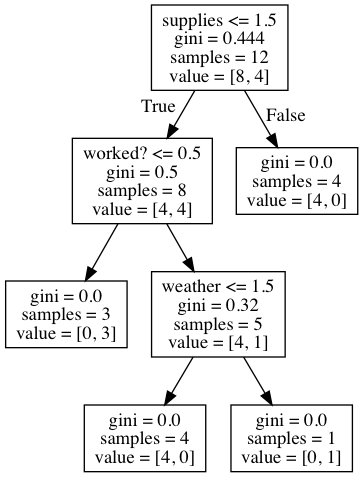

In [14]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

io_data = StringIO()  
tree.export_graphviz(my_tree, out_file=io_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(io_data.getvalue())  
Image(graph.create_png())  